<a href="https://colab.research.google.com/github/AnthonyFundzak/Fundzak_64061/blob/main/Fundzak_64061_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The IMDB dataset

Assignment 1 Advanced Machine Learning

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5168 - accuracy: 0.7815 - val_loss: 0.3945 - val_accuracy: 0.8567
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3111 - accuracy: 0.8987 - val_loss: 0.3062 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2255 - accuracy: 0.9274 - val_loss: 0.2891 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1782 - accuracy: 0.9419 - val_loss: 0.2969 - val_accuracy: 0.8799
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1444 - accuracy: 0.9559 - val_loss: 0.3443 - val_accuracy: 0.8647
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1203 - accuracy: 0.9622 - val_loss: 0.2910 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0986 - accuracy: 0.9703 - val_loss: 0.3069 - val_accuracy: 0.8862
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

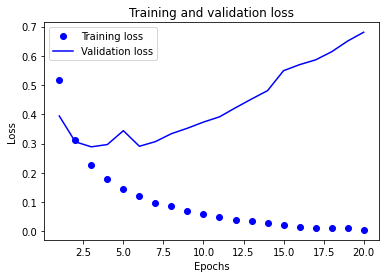

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

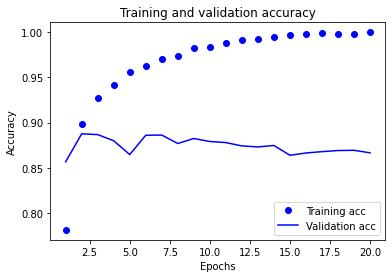

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [35]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4579 - accuracy: 0.8236
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2666 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2048 - accuracy: 0.9270
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2933 - accuracy: 0.8848


In [17]:
results

[0.29601797461509705, 0.8814399838447571]

**USING 3 HIDDEN LAYERS TO SEE HOW VALIDATION AND TEST ACCURACY ARE AFFECTED**

In [31]:
#model with 3 hidden layers instead of 2
from tensorflow import keras
from tensorflow.keras import layers

three_layer_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [32]:
three_layer_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
history_three_layer_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 53ms/step - loss: 0.1415 - accuracy: 0.9509 - val_loss: 0.1442 - val_accuracy: 0.9505
Epoch 2/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1189 - accuracy: 0.9610 - val_loss: 0.1550 - val_accuracy: 0.9440
Epoch 3/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0990 - accuracy: 0.9683 - val_loss: 0.1689 - val_accuracy: 0.9359
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0799 - accuracy: 0.9793 - val_loss: 0.1941 - val_accuracy: 0.9280
Epoch 5/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0676 - accuracy: 0.9832 - val_loss: 0.2051 - val_accuracy: 0.9242
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0552 - accuracy: 0.9857 - val_loss: 0.2331 - val_accuracy: 0.9178
Epoch 7/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0443 - accuracy: 0.9903 - val_loss: 0.2481 - val_accuracy: 0.9169
Epoch 8/10
30

In [39]:
history_dict_3layers = history.history
history_dict_3layers.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

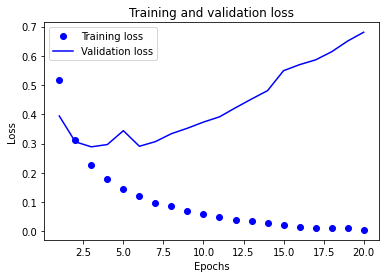

In [40]:
import matplotlib.pyplot as plt
history_dict = history_three_layer_model.history
loss_values = history_dict_3layers["loss"]
val_loss_values = history_dict_3layers["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

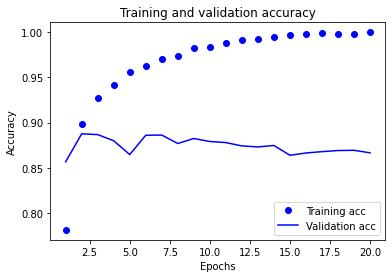

In [41]:
plt.clf()
acc = history_dict_3layers["accuracy"]
val_acc = history_dict_3layers["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

QUESTION 1: By adding a third hidden layer to the data set,the accuracy becomes more unsteady than having two layers. There is a continous decrease in the validationn accuracy in both 2 hidden and 3 hidden layers but 3 hidden layers experiences more sudden drops in accuracy of the vallidation. Training seems to inncrease at a slightly higher rate in the 3 hidden layer experientment showing the two hidden layers was overall a better fit for the dataset.  

**USING THE ORIGINAL 2 LAYERS WITH MORE HIDDEN UNITS. AND INCREASE FROM 16 TO 32**


In [62]:
#model with 2 hidden layers and a chnage to 32 units each within the hidden layers
from tensorflow import keras
from tensorflow.keras import layers

hiddenunits32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [63]:
hiddenunits32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [64]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [65]:
history_hiddenunits32 = hiddenunits32.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 63ms/step - loss: 0.4920 - accuracy: 0.7853 - val_loss: 0.3644 - val_accuracy: 0.8582
Epoch 2/10
30/30 [==============================] - 1s 42ms/step - loss: 0.2729 - accuracy: 0.9053 - val_loss: 0.2838 - val_accuracy: 0.8916
Epoch 3/10
30/30 [==============================] - 1s 41ms/step - loss: 0.1957 - accuracy: 0.9319 - val_loss: 0.3006 - val_accuracy: 0.8800
Epoch 4/10
30/30 [==============================] - 1s 40ms/step - loss: 0.1541 - accuracy: 0.9465 - val_loss: 0.2898 - val_accuracy: 0.8849
Epoch 5/10
30/30 [==============================] - 1s 41ms/step - loss: 0.1207 - accuracy: 0.9586 - val_loss: 0.3060 - val_accuracy: 0.8851
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0943 - accuracy: 0.9697 - val_loss: 0.3489 - val_accuracy: 0.8745
Epoch 7/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0700 - accuracy: 0.9815 - val_loss: 0.3588 - val_accuracy: 0.8782
Epoch 8/10
30

In [66]:
history_dict_hiddenunits32 = history.history
history_dict_hiddenunits32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

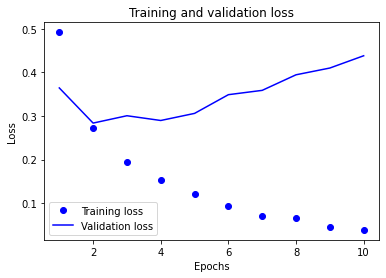

In [67]:
import matplotlib.pyplot as plt
history_dict_hiddenunits32 = history_hiddenunits32.history
loss_values = history_dict_hiddenunits32["loss"]
val_loss_values = history_dict_hiddenunits32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

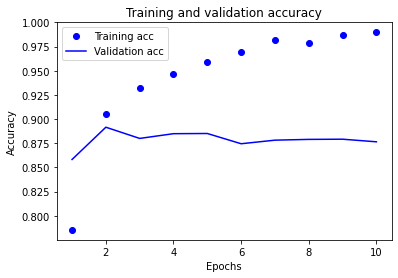

In [68]:
plt.clf()
acc = history_dict_hiddenunits32["accuracy"]
val_acc = history_dict_hiddenunits32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

QUESTION 2: Adding more units to the hidden layer seems to increase the accuracy of the validation data. The accuracy tends to hover around .875 which is a higher average than what it holds at 16 units.

USING THE MSE LOSS FUNCTION IN PLACE OF THE BINARY_CROSSENTROPY

In [71]:
#Reverting back to the original model of 2 hidden layers, 16 units in order to compare the MSE Loss function to the binary_crossentrapy
from tensorflow import keras
from tensorflow.keras import layers

MSEmodel = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Here is where you would insert the new loss function, MSE

In [73]:
MSEmodel.compile(optimizer="rmsprop",
              loss="MSE",
              metrics=["accuracy"])

In [74]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [77]:
history_MSEmodel = MSEmodel.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 103ms/step - loss: 0.1703 - accuracy: 0.7735 - val_loss: 0.1192 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0902 - accuracy: 0.9067 - val_loss: 0.0952 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0647 - accuracy: 0.9303 - val_loss: 0.0888 - val_accuracy: 0.8832
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0501 - accuracy: 0.9467 - val_loss: 0.0856 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0395 - accuracy: 0.9594 - val_loss: 0.0870 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0327 - accuracy: 0.9679 - val_loss: 0.0855 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0275 - accuracy: 0.9739 - val_loss: 0.0875 - val_accuracy: 0.8822
Epoch 8/20
3

In [78]:
history_dict_MSEmodel = history.history
history_dict_MSEmodel.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

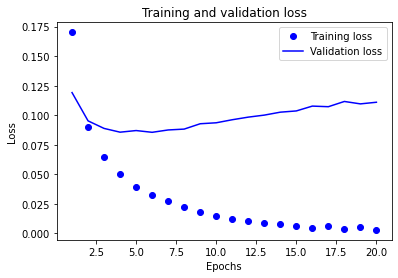

In [79]:
import matplotlib.pyplot as plt
history_dict_MSEmodel = history_MSEmodel.history
loss_values = history_dict_MSEmodel["loss"]
val_loss_values = history_dict_MSEmodel["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

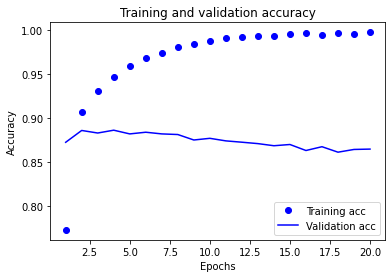

In [80]:
plt.clf()
acc = history_dict_MSEmodel["accuracy"]
val_acc = history_dict_MSEmodel["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

QUESTION 3: Using MSE loss function made the validation accuracy stay more consistent with reduced peaks and bottom out. The MSE function seems to work slightly better for this problem.

USINNG TANH ACTIVATION IN PLACE OF RELU ACTIVATION FUNNCTION

In [81]:
#Right off the bat is where we introduce the tanh activationn function
from tensorflow import keras
from tensorflow.keras import layers

TANHmodel = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [84]:
#Here I go back to binary_crossentropy to realte results back to original functions
TANHmodel.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [85]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [86]:
history_TANHmodel = TANHmodel.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.4798 - accuracy: 0.8107 - val_loss: 0.3620 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2814 - accuracy: 0.9069 - val_loss: 0.2955 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2016 - accuracy: 0.9318 - val_loss: 0.2800 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1544 - accuracy: 0.9477 - val_loss: 0.3015 - val_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1155 - accuracy: 0.9646 - val_loss: 0.3225 - val_accuracy: 0.8724
Epoch 6/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0932 - accuracy: 0.9709 - val_loss: 0.3278 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0746 - accuracy: 0.9765 - val_loss: 0.4130 - val_accuracy: 0.8636
Epoch 8/20
30

In [87]:
history_dict_TANHmodel = history.history
history_dict_TANHmodel.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

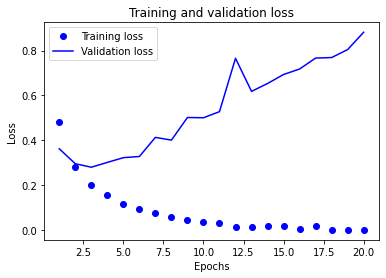

In [88]:
import matplotlib.pyplot as plt
history_dict_TANHmodel = history_TANHmodel.history
loss_values = history_dict_TANHmodel["loss"]
val_loss_values = history_dict_TANHmodel["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

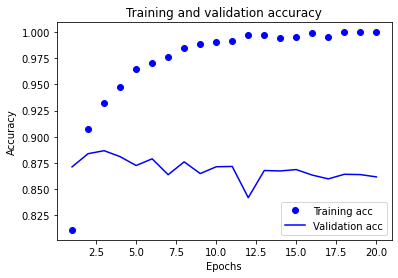

In [89]:
plt.clf()
acc = history_dict_TANHmodel["accuracy"]
val_acc = history_dict_TANHmodel["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

QUESTION 4: Tanh activation shows a pretty dramatic increase in fall of accuracy that comes with tanh activiation as supposed to relu for this data set. There are more inconsistencies and spikes in the decrease in the validation accuary of the data with tanh activation 

**Perfroming Dropout on the model for better validation. Dropout was expressed as a leading function in the field to help with validation so that is why I chose to go with this function.**

In [101]:
#Dropout is implemented in this part of the code. I use dropout within the first hidden layer. I choose a dropout of .8 in hopes of optimal and max accuracy at the end..
from tensorflow import keras
from tensorflow.keras import layers

DROPOUTmodel = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(.8),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [102]:
DROPOUTmodel.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [103]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [105]:
history_DROPOUTmodel = DROPOUTmodel.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6561 - accuracy: 0.5927 - val_loss: 0.5732 - val_accuracy: 0.8185
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.5645 - accuracy: 0.7118 - val_loss: 0.4592 - val_accuracy: 0.8605
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.4874 - accuracy: 0.7778 - val_loss: 0.3788 - val_accuracy: 0.8727
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.4398 - accuracy: 0.8185 - val_loss: 0.3412 - val_accuracy: 0.8687
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3969 - accuracy: 0.8359 - val_loss: 0.3079 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3568 - accuracy: 0.8526 - val_loss: 0.2900 - val_accuracy: 0.8916
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3418 - accuracy: 0.8559 - val_loss: 0.2814 - val_accuracy: 0.8924
Epoch 8/20
30

In [106]:
history_dict_DROPOUTmodel = history.history
history_dict_DROPOUTmodel.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

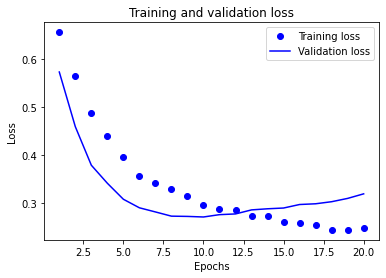

In [107]:
import matplotlib.pyplot as plt
history_dict_DROPOUTmodel = history_DROPOUTmodel.history
loss_values = history_dict_DROPOUTmodel["loss"]
val_loss_values = history_dict_DROPOUTmodel["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

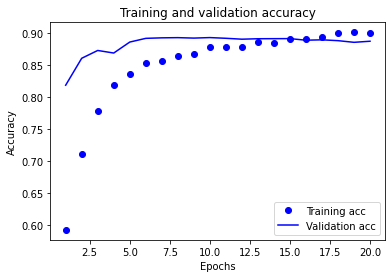

In [108]:
plt.clf()
acc = history_dict_DROPOUTmodel["accuracy"]
val_acc = history_dict_DROPOUTmodel["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

QUESTION 5: Using dropout quickly clims the validation accuracy to reach that of the training accuracy whihc is very good but then we start to see some overfitting so some adjustments would need to be made in a real world scenario to find a longer standing accuracy fit without going to overfitting. A really good start ot that meawsure though. Maybe reducing the dropout rate or adding a hidden layer could draw different results. 